# Greeks

In [1]:
import numpy as np
import math
import numpy.random as npr
from scipy.stats import norm
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.backend as kb
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [189]:
def BlackScholesCall(S0,r,sigma,T,K):
    d1 =  1 / (sigma * np.sqrt(T)) * (np.log(S0/K) + (r+sigma**2/2)*T)
    d2 = d1 - sigma * np.sqrt(T)
    return norm.cdf(d1) * S0 - norm.cdf(d2) * K * np.exp(-r*T)
def BlackScholesCallDelta(S0,r,sigma,T,K):
    d1 =  1 / (sigma * np.sqrt(T)) * (np.log(S0/K) + (r+sigma**2/2)*T)
    return norm.cdf(d1)
def BlackScholesCallVega(S0,r,sigma,T,K):
    d1 =  1 / (sigma * np.sqrt(T)) * (np.log(S0/K) + (r+sigma**2/2)*T)
    return norm.pdf(d1)*S0*np.sqrt(T)
def BlackScholesCallGamma(S0,r,sigma,T,K):
    d1 =  1 / (sigma * np.sqrt(T)) * (np.log(S0/K) + (r+sigma**2/2)*T)
    return norm.pdf(d1)/(S0*np.sqrt(T)*sigma)

def BlackScholesPut(S0,r,sigma,T,K):
    d1 =  1 / (sigma * np.sqrt(T)) * (np.log(S0/K) + (r+sigma**2/2)*T)
    d2 = d1 - sigma * np.sqrt(T)
    return norm.cdf(-d2) * K * np.exp(-r*T) - norm.cdf(-d1) * S0
def BlackScholesPutDelta(S0,r,sigma,T,K):
    d1 =  1 / (sigma * np.sqrt(T)) * (np.log(S0/K) + (r+sigma**2/2)*T)
    return norm.cdf(d1) - 1

#Binary that pays 1 == Cash or Nothing
def BlackScholesBinaryCall(S0,r,sigma,T,K):
    d1 =  1 / (sigma * np.sqrt(T)) * (np.log(S0/K) + (r+sigma**2/2)*T)
    d2 = d1 - sigma * np.sqrt(T)
    return norm.cdf(d2) * np.exp(-r*T)

def BlackScholesBinaryCallDelta(S0,r,sigma,T,K):
    d1 =  1 / (sigma * np.sqrt(T)) * (np.log(S0/K) + (r+sigma**2/2)*T)
    d2 = d1 - sigma * np.sqrt(T)
    return norm.pdf(d2) * np.exp(-r*T) / (sigma * S0 * np.sqrt(T)) 

#Binary that pays ST == Asset or Nothing
def BlackScholesBinaryCall_AN(S0,r,sigma,T,K):
    d1 =  1 / (sigma * np.sqrt(T)) * (np.log(S0/K) + (r+sigma**2/2)*T)
    d2 = d1 - sigma * np.sqrt(T)
    return S0 * norm.cdf(d1) * np.exp(-r*T)

def BlackScholesBinaryCallDelta_AN(S0,r,sigma,T,K):
    d1 =  1 / (sigma * np.sqrt(T)) * (np.log(S0/K) + (r+sigma**2/2)*T)
    d2 = d1 - sigma * np.sqrt(T)
    return np.exp(-r*T) * (norm.cdf(d1) + norm.pdf(d1) / (sigma * S0 * np.sqrt(T)))

def BlackScholesBinaryCallVega(S0,r,sigma,T,K):
    d1 =  1 / (sigma * np.sqrt(T)) * (np.log(S0/K) + (r+sigma**2/2)*T)
    d2 = d1 - sigma * np.sqrt(T)
    return - np.exp(-r*T) * d1 * norm.pdf(d2) / sigma

def BlackScholesBinaryCallGamma(S0,r,sigma,T,K):
    d1 =  1 / (sigma * np.sqrt(T)) * (np.log(S0/K) + (r+sigma**2/2)*T)
    d2 = d1 - sigma * np.sqrt(T)
    return - np.exp(-r*T) * d1 * norm.pdf(d2) / (S0*K*T*sigma**2)

#Continuous observations

def PriceBarrierOptions(S, r, sigma, T, K, H,option_type):
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))

    nd1 = norm.cdf(d1, 0.0, 1.0)
    nd2 = norm.cdf(d2, 0.0, 1.0)
    nd1minus = norm.cdf(-d1, 0.0, 1.0)
    nd2minus = norm.cdf(-d2, 0.0, 1.0)

    l = (r + (sigma * sigma *0.5)) / (sigma * sigma)
    y = np.log((H*H)/(S*K)) / (sigma * np.sqrt(T)) + l * sigma * np.sqrt(T)
    x1 = np.log(S/H)/(sigma * np.sqrt(T))+l*sigma * np.sqrt(T)
    y1 = np.log(H/S)/(sigma * np.sqrt(T))+l*sigma * np.sqrt(T)

    c = S * nd1 - K * np.exp(-r*T) * nd2
    p = K * np.exp(-r*T) * nd2minus  - S * nd1minus

        
    if H<=K and S<=H:
        cdo = pdo = 0
        cdi = S * (H/S)**(2*l) * norm.cdf(y) - K * np.exp(-r*T) * (H/S)**(2*l-2.0) * norm.cdf(y-sigma*np.sqrt(T))
        cui = c
        cuo = 0.
        puo = -S*norm.cdf(-x1) + K * np.exp(-r*T) * norm.cdf(-x1+sigma*np.sqrt(T)) +  S*(H/S)**(2*l)*norm.cdf(-y1) - K * np.exp(-r*T)*(H/S)**(2*l-2.0)*norm.cdf(-y1+sigma*np.sqrt(T))
        pui = p - puo
        #pdi = - S * norm.cdf(-x1) + K * np.exp(-r*T) * norm.cdf(-x1+sigma*np.sqrt(T)) + S*(H/S)**(2*l)*(norm.cdf(y)-norm.cdf(y1))-K*np.exp(-r*T)*(H/S)**(2*l-2.0)*(norm.cdf(y-sigma*np.sqrt(T))-norm.cdf(y1-sigma*np.sqrt(T))) 
        pdi = p
    
    elif H<=K and S>=H:
        cuo=puo = 0
        cdi = S * (H/S)**(2*l) * norm.cdf(y) - K * np.exp(-r*T) * (H/S)**(2*l-2.0) * norm.cdf(y-sigma*np.sqrt(T))
        cdo = c - cdi
        cui = c
        pui = p - puo
        pdi = - S * norm.cdf(-x1) + K * np.exp(-r*T) * norm.cdf(-x1+sigma*np.sqrt(T)) + S*(H/S)**(2*l)*(norm.cdf(y)-norm.cdf(y1))-K*np.exp(-r*T)*(H/S)**(2*l-2.0)*(norm.cdf(y-sigma*np.sqrt(T))-norm.cdf(y1-sigma*np.sqrt(T))) 
        pdo=p-pdi

        
    elif H>K and S<=H:
        #cdo = S * norm.cdf(x1) - K * np.exp(-r*T) * norm.cdf(x1-sigma*np.sqrt(T)) - S * (H/S)**(2*l)*norm.cdf(y1) + K * np.exp(-r*T)*(H/S)**(2*l-2.0)*norm.cdf(y1-sigma*np.sqrt(T))
        cdo = pdo = 0
        cdi = c - cdo
        cui =  S * norm.cdf(x1) - K * np.exp(-r*T) * norm.cdf(x1 - sigma*np.sqrt(T)) - S*(H/S)**(2*l)*(norm.cdf(-y)-norm.cdf(-y1)) + K*np.exp(-r*T)*(H/S)**(2*l-2.0)*(norm.cdf(-y+sigma*np.sqrt(T))-norm.cdf(-y1+sigma*np.sqrt(T)))
        cuo = c - cui
        pui = - S * (H/S)**(2*l) * norm.cdf(-y) + K * np.exp(-r*T) * (H/S)**(2*l-2.0)* norm.cdf(-y+sigma*np.sqrt(T))
        puo = p - pui
        pdi = p
        
    elif H>K and S>=H:
        pdo = 0
        cuo=puo = 0
        cdo = S * norm.cdf(x1) - K * np.exp(-r*T) * norm.cdf(x1-sigma*np.sqrt(T)) - S * (H/S)**(2*l)*norm.cdf(y1) + K * np.exp(-r*T)*(H/S)**(2*l-2.0)*norm.cdf(y1-sigma*np.sqrt(T))
        cdi = c - cdo
        cui =  c#S * norm.cdf(x1) - K * np.exp(-r*T) * norm.cdf(x1 - sigma*np.sqrt(T)) - S*(H/S)**(2*l)*(norm.cdf(-y)-norm.cdf(-y1)) + K*np.exp(-r*T)*(H/S)**(2*l-2.0)*(norm.cdf(-y+sigma*np.sqrt(T))-norm.cdf(-y1+sigma*np.sqrt(T)))
        pui = - S * (H/S)**(2*l) * norm.cdf(-y) + K * np.exp(-r*T) * (H/S)**(2*l-2.0)* norm.cdf(-y+sigma*np.sqrt(T))
        pdi = p
    

    result = {
        'c' : c,
        'p' : p,
        'cdi' : cdi,
        'cdo' : cdo,
        'cui' : cui,
        'cuo' : cuo,
        'pdi' : pdi,
        'pdo' : pdo,
        'pui' : pui,
        'puo' : puo,
    }
    return result[option_type] 
xxx = np.linspace(0.7,4.2)
vf = np.vectorize(PriceBarrierOptions)
r, sigma, T, K, H = 0.02 , 0.2, 0.1, 0.9, 1
print("(r, sigma, T, K, H)")
print((r, sigma, T, K, H))

def sigmoid(x):
    z = np.exp(-x)
    return 1 / (1 + z)

(r, sigma, T, K, H)
(0.02, 0.2, 0.1, 0.9, 1)


Text(0, 0.5, 'Delta')

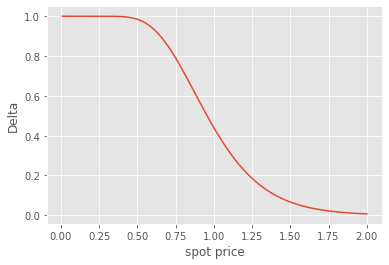

In [13]:
delta_put=np.vectorize(BlackScholesPutDelta) 
x = np.linspace(0.01,2,1000)
S0,r,sigma,T,K=1,0,0.3,1,1
plt.plot(x, -delta_put(x,r,sigma,T,K))#Short put
plt.xlabel("spot price")
plt.ylabel("Delta")

0.07012879901849711

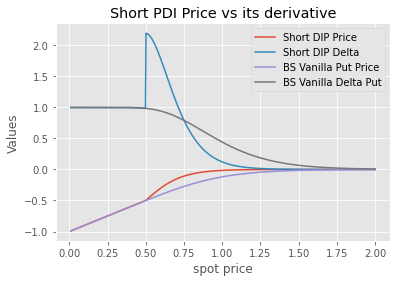

In [45]:
S0,r,sigma,T,K=1,0,0.3,1,1
H_DIP = 0.5
x = np.arange(0.01,2,0.001)
dx = (x[1]-x[0])/0.5
vect = np.vectorize(PriceBarrierOptions,otypes=[float])
vect2 = np.vectorize(BlackScholesPut,otypes=[float])
delta_put=np.vectorize(BlackScholesPutDelta) 
x = np.linspace(0.01,2,1000)
y = -vect(x, r, sigma, T, K, H_DIP, "pdi")
dydx = np.gradient(y, dx)
plt.plot(x,y,label="Short DIP Price")
plt.plot(x,dydx,label="Short DIP Delta")
plt.plot(x,-vect2(x,r,sigma,T,K),label="BS Vanilla Put Price")
plt.plot(x, -delta_put(x,r,sigma,T,K),label="BS Vanilla Delta Put")#Short put

plt.xlabel("spot price")
plt.ylabel("Values")
plt.legend()
plt.title("Short PDI Price vs its derivative")

PriceBarrierOptions(1,r,sigma,T,0.9,1,"pdi")

## Upside: digital calls

### Payoffs

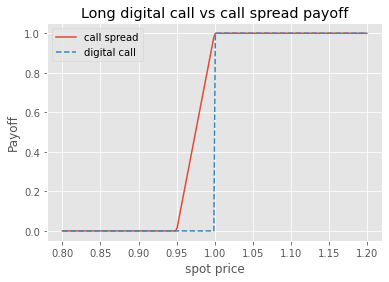

In [162]:
def payoff_call_spread(x,k1,k2): #pays 1
    b_width = 1/(k2 - k1)
    return b_width*(np.maximum(x-k1,0) - np.maximum(x-k2,0))

def payoff_binary_call(x,k): #pays 1
    if x<k:
        return 0
    else:
        return 1
    
c_s = np.vectorize(payoff_call_spread)
b_c = np.vectorize(payoff_binary_call)
k1,k2 = 0.95, 1
k=1
x = np.linspace(0.8,1.2,200)
plt.plot(x,c_s(x,k1,k2),label="call spread")
plt.plot(x,b_c(x,k),linestyle="dashed",label="digital call")
plt.xlabel("spot price")
plt.ylabel("Payoff")
plt.legend()
plt.title("Long digital call vs call spread payoff")
plt.show()

### Delta

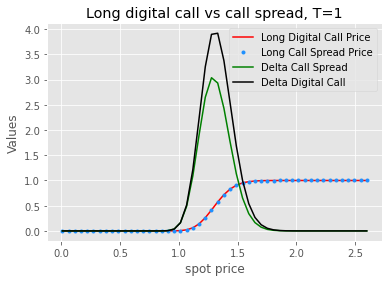

In [211]:
S0,r,sigma,T,K=1,0,0.1,1,1.3
H_Digit = 1.30
k1,k2=1.28,1.32
b_width= (k2 - k1)
s_0_test = 1.30
x = np.linspace(0.01,s_0_test*2)

plt.plot(x,BlackScholesBinaryCall(x, r,sigma,T, H_Digit),label="Long Digital Call Price",linestyle='solid',color = 'red')
plt.plot(x,(1/b_width)*(BlackScholesCall(x, r,sigma,T, k1)-BlackScholesCall(x, r,sigma,T, k2)),label="Long Call Spread Price",marker=".",linestyle=' ',color = 'dodgerblue')
plt.plot(x,(1/b_width)*(BlackScholesCallDelta(x, r,sigma,T, k1)-BlackScholesCallDelta(x, r,sigma,T, k2)),label="Delta Call Spread",color = 'g')
plt.plot(x,x*BlackScholesBinaryCallDelta(x, r,sigma,T, H_Digit),label="Delta Digital Call",color = 'k')
plt.legend()

plt.xlabel("spot price")
plt.ylabel("Values")
plt.title("Long digital call vs call spread, T=1")
plt.show()

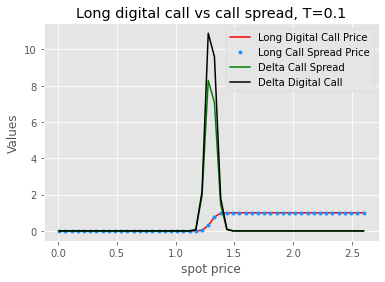

In [216]:
S0,r,sigma,T,K=1,0,0.1,0.1,1.3
H_Digit = 1.30
k1,k2=1.28,1.32
b_width= (k2 - k1)
s_0_test = 1.30
x = np.linspace(0.01,s_0_test*2)

plt.plot(x,BlackScholesBinaryCall(x, r,sigma,T, H_Digit),label="Long Digital Call Price",linestyle='solid',color = 'red')
plt.plot(x,(1/b_width)*(BlackScholesCall(x, r,sigma,T, k1)-BlackScholesCall(x, r,sigma,T, k2)),label="Long Call Spread Price",marker=".",linestyle=' ',color = 'dodgerblue')
plt.plot(x,(1/b_width)*(BlackScholesCallDelta(x, r,sigma,T, k1)-BlackScholesCallDelta(x, r,sigma,T, k2)),label="Delta Call Spread",color = 'g')
plt.plot(x,x*BlackScholesBinaryCallDelta(x, r,sigma,T, H_Digit),label="Delta Digital Call",color = 'k')
plt.legend()

plt.xlabel("spot price")
plt.ylabel("Values")
plt.title("Long digital call vs call spread, T=0.1")
plt.show()

### Vega

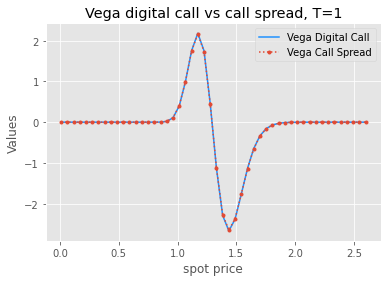

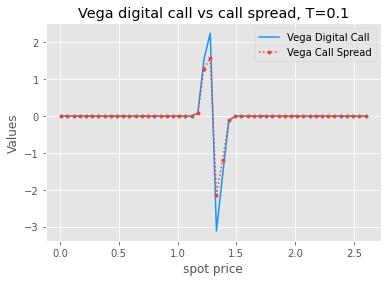

In [240]:
S0,r,sigma,T,K=1,0,0.1,1,1.3
H_Digit = 1.30
k1,k2=1.28,1.32
b_width= (k2 - k1)
x = np.linspace(0.01,s_0_test*2)

plt.plot(x,BlackScholesBinaryCallVega(x, r,sigma,T, H_Digit),label="Vega Digital Call",color="dodgerblue")
plt.plot(x,(1/b_width)*(BlackScholesCallVega(x, r,sigma,T, k1)-BlackScholesCallVega(x, r,sigma,T, k2)),label="Vega Call Spread",marker=".",linestyle='dotted')
plt.legend()

plt.xlabel("spot price")
plt.ylabel("Values")
plt.title("Vega digital call vs call spread, T=1")
plt.show()

S0,r,sigma,T,K=1,0,0.1,0.1,1.3
H_Digit = 1.30
k1,k2=1.28,1.32
b_width= (k2 - k1)
x = np.linspace(0.01,s_0_test*2)

plt.plot(x,x*BlackScholesBinaryCallVega(x, r,sigma,T, H_Digit),label="Vega Digital Call",color="dodgerblue")
plt.plot(x,(1/b_width)*(BlackScholesCallVega(x, r,sigma,T, k1)-BlackScholesCallVega(x, r,sigma,T, k2)),label="Vega Call Spread",marker=".",linestyle='dotted')
plt.legend()

plt.xlabel("spot price")
plt.ylabel("Values")
plt.title("Vega digital call vs call spread, T=0.1")
plt.show()

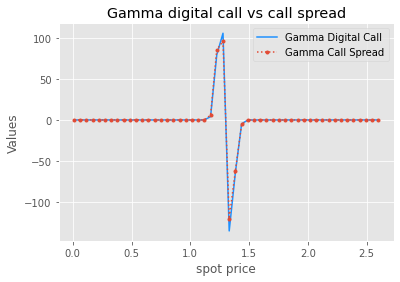

In [234]:
S0,r,sigma,T,K=1,0,0.1,0.1,1.3
H_Digit = 1.30
k1,k2=1.28,1.32
b_width= (k2 - k1)
x = np.linspace(0.01,2.6)

plt.plot(x,BlackScholesBinaryCallGamma(x, r,sigma,T, H_Digit),label="Gamma Digital Call",color="dodgerblue")
plt.plot(x,(1/b_width)*(BlackScholesCallGamma(x, r,sigma,T, k1)-BlackScholesCallGamma(x, r,sigma,T, k2)),label="Gamma Call Spread",marker=".",linestyle='dotted')
plt.legend()

plt.xlabel("spot price")
plt.ylabel("Values")
plt.title("Gamma digital call vs call spread")
plt.show()